# Setup

## Function Setup

In [19]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import requests
import concurrent.futures
from collections import Counter
import pandas as pd
import ast
import json


In [20]:
def exploratory_stats(arrays, array_names):
    stats_list = []
    for idx, array in enumerate(list(arrays)):
        array_name = array_names[idx]
        np_array = np.array(array, dtype=float)  # Ensure the array has a float dtype to handle NaNs

        mean = np.nanmean(np_array).round(2)
        median = np.nanmedian(np_array).round(2)
        min_value = np.nanmin(np_array).round(2)
        max_value = np.nanmax(np_array).round(2)
        std_dev = np.nanstd(np_array).round(2)
        q25 = np.nanpercentile(np_array, 25).round(2)
        q75 = np.nanpercentile(np_array, 75).round(2)

        stats_list.append([ array_name, min_value, q25,mean,  q75, max_value, median, std_dev])

    stats_df = pd.DataFrame(stats_list,
                            columns=[
                                'Article Category', 'Min', '1st Quantile', 'Mean', '3rd Quantile',
                                'Max', 'Median', 'Standard Deviation'
                            ])

    return stats_df

# define a function to read JSON file and return data
def read_json_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data



In [21]:


# initialize an empty DataFrame
df = pd.DataFrame()

# specify the directory where JSON files are stored
dir_path = "data/data_files/fang-covid/articles/"
temp_df = pd.DataFrame()
source_arr = []
date_arr = []
article_arr = []
label_arr=[]
# loop over all JSON files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.json'):
        full_filename = os.path.join(dir_path, filename)

        f = open(full_filename)
        single_fang = json.load(f)
        f.close()

        # append data to DataFrame
        source_arr.append(single_fang['source'])
        date_arr.append(single_fang['date'])
        article_arr.append(single_fang['article'])
        label_arr.append(single_fang['label'])

df['Publisher']=source_arr
df['Date']=date_arr
df['Article']=article_arr
df['Veracity']=label_arr
df['word_count'] = np.array(df['Article'].apply(lambda x: len(str(x).split())))
df['char_count'] = df['Article'].apply(lambda x: len(str(x)))

# keep only 'source', 'date', 'label' and 'article'
# df = df[['source', 'date', 'label', 'article']]

## Data Setup

In [22]:
whole_dict = {
    'protected': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')
    },
    'excellent': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
    },
    'readworthy': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
    },
    'random': {
        'df':
        pd.read_csv(f'data/data_files/pipeline_steps/random_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/random_articles/0_random_titles.csv')
    },
}


In [23]:
excellent_art = pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv')
readworthy_art = pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv')
protected_art = pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv')
random_art = pd.read_csv(
    f'data/data_files/pipeline_steps/random_articles/1_all_articles_fetched.csv')



max_len = max(len(excellent_art.dropna()), len(readworthy_art.dropna()), len(protected_art.dropna()),
              len(random_art.dropna()),len(df.dropna()))
new_index = np.arange(max_len)


name_list = []
category_name_list = ['protected','excellent','readworthy','random']

# for key,value in whole_dict.items():
#     name_list.append(key+' Articles')
#     category_name_list.append(key)

char_count_article_df = pd.DataFrame()


In [24]:
word_count_article_protected = np.array(protected_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_excellent = np.array(excellent_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_readworthy = np.array(readworthy_art['sub_texts'].apply(
    lambda x: len(str(x).split())))
word_count_article_protected = np.concatenate([word_count_article_protected , np.array([np.nan] * (
    max_len - len(word_count_article_protected)))])
word_count_article_excellent = np.concatenate([word_count_article_excellent , np.array([np.nan] * (
    max_len - len(word_count_article_excellent)))])
word_count_article_readworthy = np.concatenate([word_count_article_readworthy , np.array([np.nan] * (
    max_len - len(word_count_article_readworthy)))])

word_count_article_random = np.array(random_art['sub_texts'].apply(
    lambda x: len(str(x).split())))
word_count_article_random = np.concatenate([word_count_article_random, np.array([np.nan] * (
    max_len - len(word_count_article_random)))])



In [25]:
for key,value in whole_dict.items():
    curr_df = value['df'].dropna()
    whole_dict[key]['word_count'] = np.array(curr_df['sub_texts'].apply(lambda x: len(str(x).split())))
    whole_dict[key]['word_count'] = np.concatenate([
        whole_dict[key]['word_count'],
        np.array([np.nan] * (max_len - len(whole_dict[key]['word_count'])))
    ])
    print(key)
    print(whole_dict[key]['word_count'])


protected
[7.234e+03 4.000e+00 5.000e+00 ...       nan       nan       nan]
excellent
[2592. 2819. 2522. ...   nan   nan   nan]
readworthy
[2061. 4194. 1432. ...   nan   nan   nan]
random
[  6. 166. 337. ...  82. 242. 239.]


# Character count

In [36]:
char_count_article_protected = protected_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_excellent = excellent_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_readworthy = readworthy_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_random = random_art['sub_texts'].apply(lambda x: len(str(x)))

In [37]:
datasets = {
    'Protected': char_count_article_protected,
    'Excellent': char_count_article_excellent,
    'Readworthy': char_count_article_readworthy,
    'Random': char_count_article_random
}

for name, data in datasets.items():
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    max_whiskers = Q3 + (IQR*1.5)
    print(f"For {name} dataset:")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"Max whiskers (Q3 + 1.5* IQR): {max_whiskers}\n")

For Protected dataset:
Q1 (25th percentile): 2414.0
Q3 (75th percentile): 22191.0
Max whiskers (Q3 + 1.5* IQR): 51856.5

For Excellent dataset:
Q1 (25th percentile): 18152.0
Q3 (75th percentile): 49075.0
Max whiskers (Q3 + 1.5* IQR): 95459.5

For Readworthy dataset:
Q1 (25th percentile): 12222.5
Q3 (75th percentile): 32566.5
Max whiskers (Q3 + 1.5* IQR): 63082.5

For Random dataset:
Q1 (25th percentile): 640.0
Q3 (75th percentile): 2871.0
Max whiskers (Q3 + 1.5* IQR): 6217.5



In [28]:
char_count_article_protected = np.concatenate([
    char_count_article_protected,
    np.array([np.nan] * (max_len - len(char_count_article_protected)))
])
char_count_article_excellent = np.concatenate([
    char_count_article_excellent,
    np.array([np.nan] * (max_len - len(char_count_article_excellent)))
])
char_count_article_readworthy = np.concatenate([
    char_count_article_readworthy,
    np.array([np.nan] * (max_len - len(char_count_article_readworthy)))
])
char_count_article_random = np.concatenate([
    char_count_article_random,
    np.array([np.nan] * (max_len - len(char_count_article_random)))
])
char_count_article_FANG = np.concatenate([
    df['char_count'],
    np.array([np.nan] * (max_len - len(df)  ))                                    ])


## Exploratory stats

In [29]:
char_exp = exploratory_stats([
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy,
    char_count_article_random
], category_name_list)


In [30]:
display(char_exp)

,Article Category,Min,1st Quantile,Mean,3rd Quantile,Max,Median,Standard Deviation
0,protected,2.0,2414.0,18146.57,22191.0,254290.0,7886.0,26578.37
1,excellent,2.0,18152.0,36844.44,49075.0,362177.0,30935.5,28100.33
2,readworthy,2.0,12222.5,25872.03,32566.5,254290.0,19899.5,22454.69
3,random,1.0,640.0,2497.89,2871.0,155929.0,1482.5,4387.88


## Boxplot

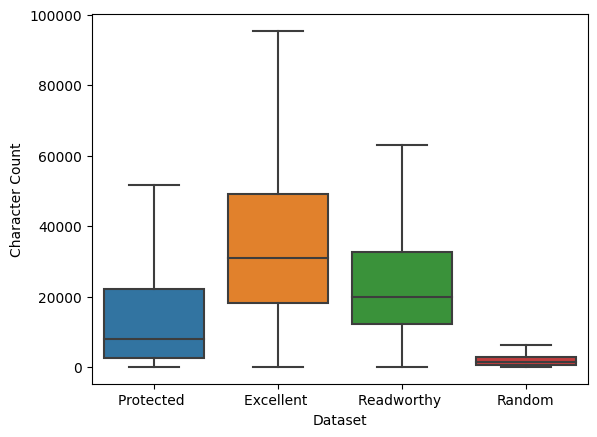

In [31]:
ax = sns.boxplot(data=[
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy,
    char_count_article_random
],
                    showfliers=False)

# Set plot title and labels
# plt.title('Character Count Distribution by Article Category')
plt.xlabel('Dataset')
plt.ylabel('Character Count')
plt.xticks([0, 1, 2,3], ['Protected ', 'Excellent ', 'Readworthy ','Random'])



# Show the plot
plt.show()

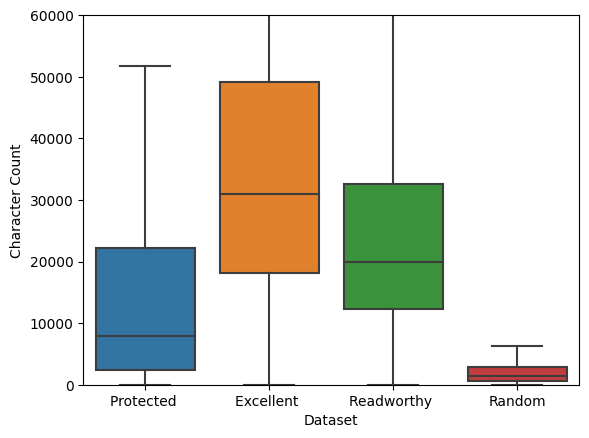

In [32]:
ax = sns.boxplot(data=[
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy,
    char_count_article_random
],
                    showfliers=False)

# Set plot title and labels
# plt.title('Character Count Distribution by Article Category')
plt.xlabel('Dataset')
plt.ylabel('Character Count')
plt.xticks([0, 1, 2,3], ['Protected ', 'Excellent ', 'Readworthy ','Random'])
ax.set_ylim(0, 60000)


# Show the plot
plt.show()

## Characters per Word

In [33]:
protected_charwords = np.nansum(char_count_article_protected) / np.nansum(
    whole_dict['protected']['word_count'])
excellent_charwords = np.nansum(char_count_article_excellent) / np.nansum(
    whole_dict['excellent']['word_count'])
readworthy_charwords = np.nansum(char_count_article_readworthy) / np.nansum(
    whole_dict['readworthy']['word_count'])
random_charwords = np.nansum(char_count_article_random) / np.nansum(
    whole_dict['random']['word_count'])


In [34]:
print(
    f"protected: {protected_charwords}, excellent: {excellent_charwords}, readworthy: {readworthy_charwords}, random: {random_charwords}"
)


protected: 7.499411763765956, excellent: 7.447989987832617, readworthy: 7.434207149423708, random: 7.272875224491842


## Boxplot incl. FANG

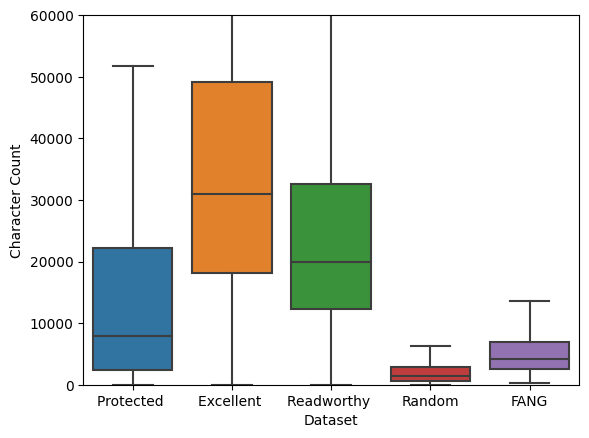

In [35]:
ax = sns.boxplot(data=[
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy,
    char_count_article_random,char_count_article_FANG
],
                    showfliers=False)

# Set plot title and labels
# plt.title('Character Count Distribution by Article Category')
plt.xlabel('Dataset')
plt.ylabel('Character Count')
plt.xticks([0, 1, 2,3,4], ['Protected ', 'Excellent ', 'Readworthy ','Random','FANG'])
ax.set_ylim(0, 60000)


# Show the plot
plt.show()